In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [2]:
file_path = "./제주21년1월부터12월이상치+주소정리1.xlsx"
jejudo = pd.read_excel(file_path)

In [17]:
# jejudo = jejudo.drop('Unnamed: 0', axis=1)
jejudo

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소,month
0,제주,서귀포,삼정지에듀,완속02,3646,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,42.55,6,38,2021-01-01,2021-01-01 16:01:42,2021-01-01 22:40:05,제주특별자치도,서귀포시,"대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",2021-01
1,제주,제주직할,삼양2동 공영주차장,급속01,8061,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,45.03,1,21,2021-01-01,2021-01-01 22:30:09,2021-01-01 23:51:43,제주특별자치도,제주시,삼양2동 2176-13,2021-01
2,제주,제주직할,LH제주본부,급속01,1431,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,63.61,2,24,2021-01-01,2021-01-01 20:19:25,2021-01-01 22:43:25,제주특별자치도,제주시,삼도1동 305-4,2021-01
3,제주,서귀포,삼아 아파트,완속02,5241,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,7.80,1,29,2021-01-01,2021-01-01 21:14:36,2021-01-01 22:43:37,제주특별자치도,서귀포시,동홍동 태평로 536,2021-01
4,제주,제주직할,아라인빌,완속01,7685,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,14.80,4,37,2021-01-01,2021-01-01 17:55:45,2021-01-01 22:33:40,제주특별자치도,제주시,제주대학로 64-29,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181584,제주,제주직할,노형아이파크,완속02,3519,제주특별자치도 제주시 노형동 원노형로 90,완속,7.0,18.90,3,7,2021-10-17,2021-10-16 22:08:32,2021-10-17 01:15:58,제주특별자치도,제주시,노형동 원노형로 90,2021-10
181585,제주,서귀포,중문메리디안,완속02,5849,제주특별자치도 서귀포시 중문동 1100로 36,완속,7.0,26.79,4,31,2021-10-17,2021-10-16 21:35:11,2021-10-17 02:06:26,제주특별자치도,서귀포시,중문동 1100로 36,2021-10
181586,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,32.33,5,54,2021-10-17,2021-10-16 21:05:09,2021-10-17 03:00:06,제주특별자치도,제주시,노형동 광평동로 66,2021-10
181587,제주,제주직할,제주으뜸마을LH 아파트,급속01,3610,제주특별자치도 제주시 노형동 진군1길 3,급속,50.0,16.88,0,29,2021-10-17,2021-10-17 12:22:40,2021-10-17 12:51:44,제주특별자치도,제주시,노형동 진군1길 3,2021-10


In [4]:
jejudo_fast=jejudo[jejudo['충전기구분'] == '급속']
jejudo_slow =jejudo[jejudo['충전기구분'] == '완속']


In [5]:
jejudo_fast_Seogwipo = jejudo_fast[jejudo_fast['구']=='서귀포시']
jejudo_fast_jeju = jejudo_fast[jejudo_fast['구']=='제주시']

In [6]:
jejudo_slow_Seogwipo = jejudo_slow[jejudo_slow['구']=='서귀포시']
jejudo_slow_jeju = jejudo_slow[jejudo_slow['구']=='제주시']

In [18]:
# 충전종료일자 컬럼을 datetime 타입으로 변환
jejudo['충전종료일자'] = pd.to_datetime(jejudo['충전종료일자'])

# 연도와 월만 추출하여 새로운 컬럼 '연월' 생성
jejudo['연월'] = jejudo['충전종료일자'].apply(lambda x: x.strftime('%Y-%m'))

# 월별 데이터프레임 저장을 위한 빈 딕셔너리 생성
monthly_dataframes = {}

# 연월별로 그룹화한 후, 딕셔너리에 저장
for name, group in jejudo.groupby('연월'):
    monthly_dataframes[name] = group


In [20]:
monthly_dataframes['2021-01']

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소,month,연월
0,제주,서귀포,삼정지에듀,완속02,3646,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,42.55,6,38,2021-01-01,2021-01-01 16:01:42,2021-01-01 22:40:05,제주특별자치도,서귀포시,"대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",2021-01,2021-01
1,제주,제주직할,삼양2동 공영주차장,급속01,8061,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,45.03,1,21,2021-01-01,2021-01-01 22:30:09,2021-01-01 23:51:43,제주특별자치도,제주시,삼양2동 2176-13,2021-01,2021-01
2,제주,제주직할,LH제주본부,급속01,1431,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,63.61,2,24,2021-01-01,2021-01-01 20:19:25,2021-01-01 22:43:25,제주특별자치도,제주시,삼도1동 305-4,2021-01,2021-01
3,제주,서귀포,삼아 아파트,완속02,5241,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,7.80,1,29,2021-01-01,2021-01-01 21:14:36,2021-01-01 22:43:37,제주특별자치도,서귀포시,동홍동 태평로 536,2021-01,2021-01
4,제주,제주직할,아라인빌,완속01,7685,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,14.80,4,37,2021-01-01,2021-01-01 17:55:45,2021-01-01 22:33:40,제주특별자치도,제주시,제주대학로 64-29,2021-01,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20455,제주,제주직할,노형지구중흥S클래스 아파트,완속01,3521,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,36.85,5,43,2021-01-31,2021-01-30 20:57:01,2021-01-31 02:40:04,제주특별자치도,제주시,노형동 광평동로 66,2021-01,2021-01
20456,제주,제주직할,방선문4차빌리지,완속01,3533,제주특별자치도 제주시 도남동 629,완속,7.0,16.57,2,41,2021-01-31,2021-01-30 21:18:14,2021-01-31 00:00:09,제주특별자치도,제주시,도남동 629,2021-01,2021-01
20457,제주,제주직할,미듬하나로 아파트,완속01,5224,제주특별자치도 제주시 도련일동 삼봉로 115-1,완속,7.0,41.43,6,20,2021-01-31,2021-01-30 19:29:05,2021-01-31 01:50:03,제주특별자치도,제주시,도련일동 삼봉로 115-1,2021-01,2021-01
20458,제주,제주직할,화북주공2 아파트,급속01,5844,제주특별자치도 제주시 동화로1길 39,급속,50.0,37.37,1,25,2021-01-31,2021-01-30 22:34:37,2021-01-31 00:00:12,제주특별자치도,제주시,동화로1길 39,2021-01,2021-01


In [21]:
# 연월과 구로 그룹화한 후 충전량 합계 계산
grouped = jejudo.groupby(['연월', '구', '충전기구분'])['충전량'].sum().reset_index()

# 결과 출력
grouped

,연월,구,충전기구분,충전량
0,2021-01,서귀포시,급속,89350.580000
1,2021-01,서귀포시,완속,28419.040000
2,2021-01,제주시,급속,205892.543000
3,2021-01,제주시,완속,94236.340000
4,2021-02,서귀포시,급속,95231.660000
5,2021-02,서귀포시,완속,26936.310000
6,2021-02,제주시,급속,204724.982000
7,2021-02,제주시,완속,92466.940000
8,2021-03,서귀포시,급속,101274.470000
9,2021-03,서귀포시,완속,30366.850000


In [22]:
# 1. 충전기 구분 추가 및 월별로 그룹화
jejudo['month'] = jejudo['충전종료일자'].dt.to_period('M')
monthly_charging_by_type = jejudo.groupby(['구', '충전소명', 'month', '충전기구분'])['충전량'].sum().reset_index()

# 2. 급속 및 완속 충전기 월별 충전량 비교를 위한 데이터 프레임 생성
monthly_charging_by_type_pivot1 = monthly_charging_by_type.pivot_table(index=['구', '충전소명', 'month'], values='충전량').reset_index()

# 새로운 데이터 프레임 출력
print(monthly_charging_by_type_pivot1)

         구         충전소명    month       충전량
0     서귀포시  가시리 조랑말체험공원  2021-01   284.460
1     서귀포시  가시리 조랑말체험공원  2021-02   395.120
2     서귀포시  가시리 조랑말체험공원  2021-03  2304.530
3     서귀포시  가시리 조랑말체험공원  2021-04  1513.760
4     서귀포시  가시리 조랑말체험공원  2021-05   201.840
...    ...          ...      ...       ...
2303   제주시    화북주공2 아파트  2021-07  3590.535
2304   제주시    화북주공2 아파트  2021-08  3491.350
2305   제주시    화북주공2 아파트  2021-09  2635.170
2306   제주시    화북주공2 아파트  2021-10  1577.350
2307   제주시  환경성질환예방관리센터  2021-08    27.200

[2308 rows x 4 columns]


In [23]:
# 1. 충전기 구분 추가 및 월별로 그룹화
jejudo['month'] = jejudo['충전종료일자'].dt.to_period('M')
monthly_charging_by_type = jejudo.groupby(['구', '충전소명', 'month', '충전기구분'])['충전량'].sum().reset_index()

# 2. 급속 및 완속 충전기 월별 충전량 비교를 위한 데이터 프레임 생성
monthly_charging_by_type_pivot = monthly_charging_by_type.pivot_table(index=['구', '충전소명', 'month'], columns='충전기구분', values='충전량').reset_index()

# 새로운 데이터 프레임 출력
print(monthly_charging_by_type_pivot)

충전기구분     구         충전소명    month       급속       완속
0      서귀포시  가시리 조랑말체험공원  2021-01   284.46      NaN
1      서귀포시  가시리 조랑말체험공원  2021-02   395.12      NaN
2      서귀포시  가시리 조랑말체험공원  2021-03  2304.53      NaN
3      서귀포시  가시리 조랑말체험공원  2021-04  1513.76      NaN
4      서귀포시  가시리 조랑말체험공원  2021-05   201.84      NaN
...     ...          ...      ...      ...      ...
2303    제주시    화북주공2 아파트  2021-07  2969.25  4211.82
2304    제주시    화북주공2 아파트  2021-08  2268.25  4714.45
2305    제주시    화북주공2 아파트  2021-09   418.93  4851.41
2306    제주시    화북주공2 아파트  2021-10   648.32  2506.38
2307    제주시  환경성질환예방관리센터  2021-08    27.20      NaN

[2308 rows x 5 columns]


In [24]:
monthly_charging_by_type_pivot.fillna(0, inplace=True)

In [25]:
monthly_charging_by_type_pivot

충전기구분,구,충전소명,month,급속,완속
0,서귀포시,가시리 조랑말체험공원,2021-01,284.46,0.00
1,서귀포시,가시리 조랑말체험공원,2021-02,395.12,0.00
2,서귀포시,가시리 조랑말체험공원,2021-03,2304.53,0.00
3,서귀포시,가시리 조랑말체험공원,2021-04,1513.76,0.00
4,서귀포시,가시리 조랑말체험공원,2021-05,201.84,0.00
...,...,...,...,...,...
2303,제주시,화북주공2 아파트,2021-07,2969.25,4211.82
2304,제주시,화북주공2 아파트,2021-08,2268.25,4714.45
2305,제주시,화북주공2 아파트,2021-09,418.93,4851.41
2306,제주시,화북주공2 아파트,2021-10,648.32,2506.38


In [26]:
# 월별 급속/완속 충전기의 총 충전량
monthly_charging_by_type = monthly_charging_by_type_pivot.groupby('month')[['급속', '완속']].sum().reset_index()
print(monthly_charging_by_type)

충전기구분    month             급속             완속
0      2021-01  295243.123000  122655.380000
1      2021-02  299956.642000  119403.250000
2      2021-03  326181.058000  134227.540000
3      2021-04  294309.161000  131105.134875
4      2021-05  142847.625000   63036.890000
5      2021-07  328219.573000  145437.530000
6      2021-08  317156.898000  143985.510000
7      2021-09  304159.260942  135182.360000
8      2021-10  189947.772942   75213.610000


In [30]:
monthly_charging_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   month   9 non-null      period[M]
 1   급속      9 non-null      float64  
 2   완속      9 non-null      float64  
dtypes: float64(2), period[M](1)
memory usage: 344.0 bytes


In [29]:
monthly_charging_by_type

충전기구분,month,급속,완속
0,2021-01,295243.123000,122655.380000
1,2021-02,299956.642000,119403.250000
2,2021-03,326181.058000,134227.540000
3,2021-04,294309.161000,131105.134875
4,2021-05,142847.625000,63036.890000
5,2021-07,328219.573000,145437.530000
6,2021-08,317156.898000,143985.510000
7,2021-09,304159.260942,135182.360000
8,2021-10,189947.772942,75213.610000


In [45]:
# monthly_charging_by_type = monthly_charging_by_type.sort_index('month')
monthly_charging_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   12 non-null     object 
 1   급속      10 non-null     float64
 2   완속      10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 416.0+ bytes


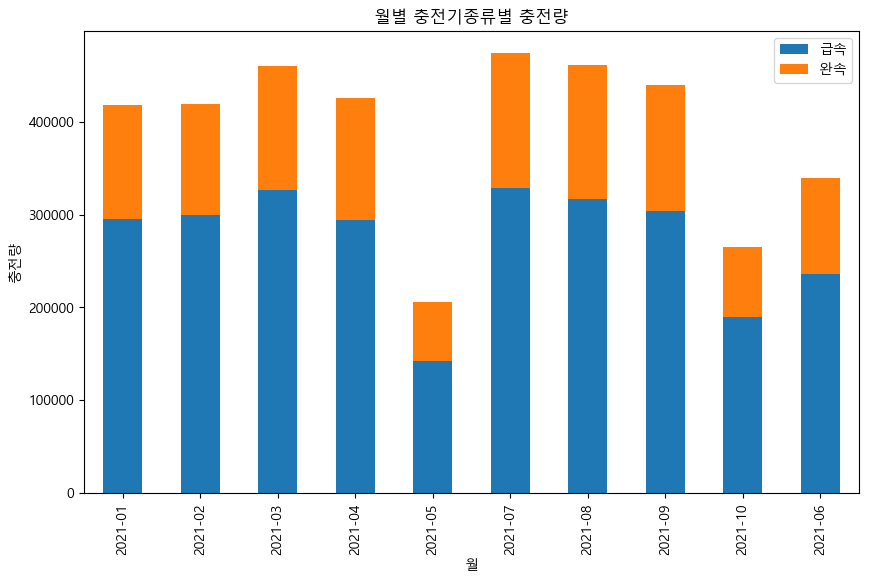

In [35]:
# 5월과 7월의 평균값 계산
may_jun_jul_avg = monthly_charging_by_type[(monthly_charging_by_type['month'] == '2021-05') | (monthly_charging_by_type['month'] == '2021-07')].mean()

# 6월 데이터 생성
jun_data = {'month': '2021-06', '급속': may_jun_jul_avg['급속'], '완속': may_jun_jul_avg['완속']}

monthly_charging_by_type = monthly_charging_by_type.append(jun_data, ignore_index=True)

monthly_charging_by_type_pivot = pd.pivot_table(monthly_charging_by_type, values=['급속', '완속'], index=['month'], aggfunc=np.sum)
monthly_charging_by_type_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('월별 충전기종류별 충전량')
plt.xlabel('월')
plt.ylabel('충전량')
plt.show()


In [8]:
# 서귀포시에서의 급속 충전량 합계
seogwipo_fast_total = jejudo_fast_Seogwipo['충전량'].mean()

# 제주시에서의 급속 충전량 합계
jeju_fast_total = jejudo_fast_jeju['충전량'].mean()

In [9]:
seogwipo_fast_total


18.799954576356544

In [10]:
# 서귀포시에서의 완속 충전량 합계
seogwipo_slow_total = jejudo_slow_Seogwipo['충전량'].sum()

# 제주시에서의 완속 충전량 합계
jeju_slow_total = jejudo_slow_jeju['충전량'].sum()

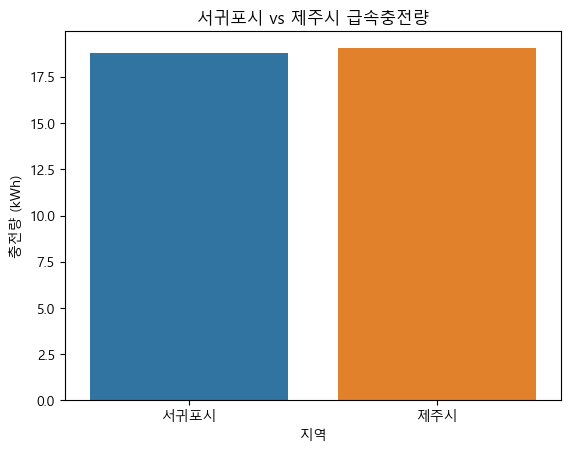

In [11]:
# 급속 그래프
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x=['서귀포시', '제주시'], y=[seogwipo_fast_total, jeju_fast_total])
plt.title('서귀포시 vs 제주시 급속충전량')
plt.xlabel('지역')
plt.ylabel('충전량 (kWh)')
plt.show()

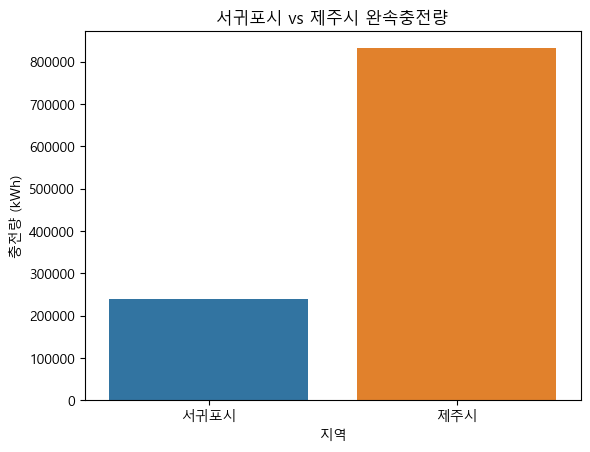

In [12]:
# 완속 그래프
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.barplot(x=['서귀포시', '제주시'], y=[seogwipo_slow_total, jeju_slow_total])
plt.title('서귀포시 vs 제주시 완속충전량')
plt.xlabel('지역')
plt.ylabel('충전량 (kWh)')
plt.show()

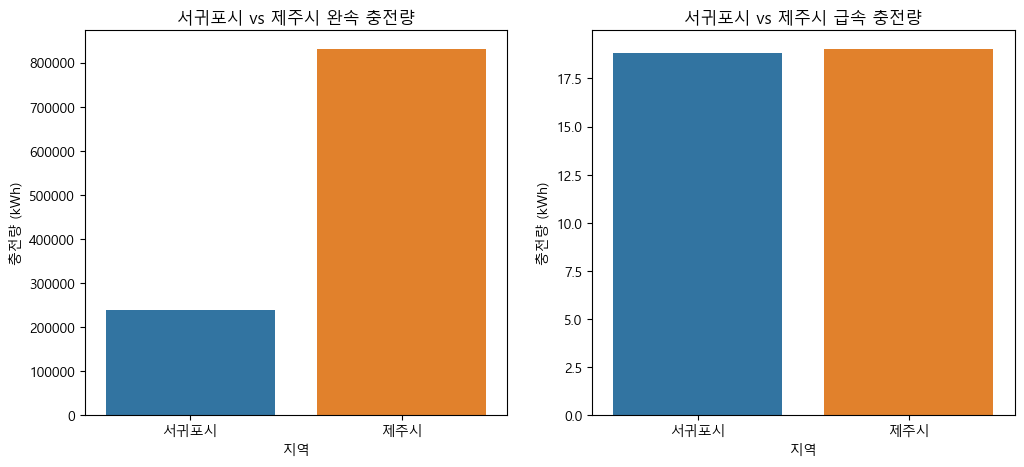

In [13]:
# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# 완속 충전량 그래프
plt.subplot(1, 2, 1)
sns.barplot(x=['서귀포시', '제주시'], y=[seogwipo_slow_total, jeju_slow_total])
plt.title('서귀포시 vs 제주시 완속 충전량')
plt.xlabel('지역')
plt.ylabel('충전량 (kWh)')

# 급속 충전량 그래프
plt.subplot(1, 2, 2)
sns.barplot(x=['서귀포시', '제주시'], y=[seogwipo_fast_total, jeju_fast_total])
plt.title('서귀포시 vs 제주시 급속 충전량')
plt.xlabel('지역')
plt.ylabel('충전량 (kWh)')

# 그래프 보이기
plt.show()


서귀포시의 급속이 많은이유는 서귀포쪽이 멀리멀리다니는장소가많고 제주시는 짧게짧게다니는곳이많다.
제주시는 인구가많아서 완속/급속비율인높은데 서귀포시는 여행객들이나 인구가적어 완속충전량이적고 급속충전량이 높다고생각됨.